In [75]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.constants import c, G, hbar, kpc
from scipy.integrate import quad
from sympy import solve, symbols, Eq
from sympy.abc import i, j, k
from sympy.physics.units import length, time, mass

### Age and diameter of the universe

In [70]:
# Planck 2018 plik consts
H0 = 67.36 # km s^-1 Mpc^-1
H0_cgs = H0 * 1e3 / (kpc.value * 1e3) # s^-1
omegam = 0.3153

# From Friedmann equation
def E(a: float) -> float:
    return np.sqrt(omegam*a**-3 + (1-omegam))

# Get age and diameter of universe
age = 1/H0_cgs*quad(lambda a: 1/(a*E(a)), 0, 1)[0]
Gyr = 60 * 60 * 24 * 365 * 1e9
diameter = 2 * c.to("cm/s").value / H0_cgs * quad(lambda a: 1/(a**2*E(a)), 0, 1)[0]

print(f"Age (Gyr): {age/Gyr}")
print(f"Age (s): {age}")
print(f"Diameter (Gpc): {(diameter / 1e2) / (kpc.value * 1e6)}")
print(f"Diameter (cm): {diameter}")

Age (Gyr): 13.8101772462598
Age (s): 4.35517749638049e+17
Diameter (Gpc): 28.830349858869567
Diameter (cm): 8.896116422606665e+28


### Natural units

In [68]:
# Define the dimensions
L = length
T = time
M = mass
L_dims = {L: 1, T: 0, M: 0}
T_dims = {L: 0, T: 1, M: 0}

# Constants and their dimensions
c_sym, hbar_sym, G_sym = symbols(r"c {\hbar} G")
t_p_sym, l_p_sym = symbols(r"t_\mathrm{Pl} \ell_\mathrm{Pl}")
c_dims = {L: 1, T: -1, M: 0}
hbar_dims = {L: 2, T: -1, M: 1}
G_dims = {L: 3, M: -1, T: -2}

# Solve for Planck time
t_p_dims = solve([i*c_dims[x] + j*hbar_dims[x] + k*G_dims[x] - T_dims[x] for x in (L, T, M)], i, j, k, dict=True)[0]

# Solve for Planck length
l_p_dims = solve([i*c_dims[x] + j*hbar_dims[x] + k*G_dims[x] - L_dims[x] for x in (L, T, M)], i, j, k, dict=True)[0]

display(Eq(t_p_sym, c_sym**t_p_dims[i] * hbar_sym**t_p_dims[j] * G_sym**t_p_dims[k]))
Eq(l_p_sym, c_sym**l_p_dims[i] * hbar_sym**l_p_dims[j] * G_sym**l_p_dims[k])

Eq(t_\mathrm{Pl}, sqrt(G)*sqrt({\hbar})/c**(5/2))

Eq(\ell_\mathrm{Pl}, sqrt(G)*sqrt({\hbar})/c**(3/2))

In [69]:
# Get the age and diameter of the universe in Planck units
t_p_cgs = c.value**t_p_dims[i] * hbar.value**t_p_dims[j] * G.value**t_p_dims[k]
l_p_cgs = c.value**l_p_dims[i] * hbar.value**l_p_dims[j] * G.value**l_p_dims[k] * 100
print(f"Age (t_p): {age / t_p_cgs}")
print(f"Diameter (l_p): {diameter / l_p_cgs}")

Age (t_p): 8.02597973438387E+60
Diameter (l_p): 5.46573463493201E+61


### Composition of universe

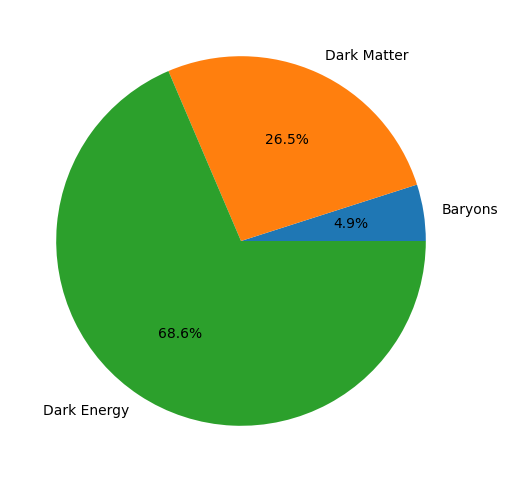

In [79]:
# More Planck consts
omegal = 0.6847
ombh2 = 0.02237
h = H0 / 100
omegab = ombh2 / h**2
omch2 = 0.1200
omegac = omch2 / h**2

labels = ["Baryons", "Dark Matter", "Dark Energy"]
sizes = [omegab, omegac, omegal]

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, autopct="%1.1f%%")
fig.savefig("universal_pie.pdf", bbox_inches="tight")